<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/Agglomerative_Hierarchical_Clustering_applied_to_automotive_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agrupamento Hierárquico Aglomerativo: aplicado à análise de mercado automotivo**


Imagine que uma fabricante de automóveis está desenvolvendo um novo veículo e, antes de lançá-lo no mercado, deseja entender o cenário competitivo e identificar os modelos existentes mais similares ao seu protótipo. A análise a seguir permitirá que a empresa posicione o novo veículo de forma estratégica,  definindo quais são seus principais concorrentes.

Para realizar esta análise, podemos utilizar métodos de agrupamento, os quais permitem segmentar o mercado automotivo em grupos distintos com base nas características dos veículos. Ao analisar esses grupos, a fabricante poderá:

1. **Identificar os clusters de veículos existentes**: para descobrir os principais grupos de veículos no mercado com base em suas similaridades.

2. **Comparar o protótipo com os clusters**: para poder avaliar qual grupo de veículos apresenta maior similaridade com o novo modelo.

3. **Definir os principais concorrentes**: determinar quais os veículos que competem diretamente com o novo modelo, permitindo um posicionamento estratégico no mercado.

4. **Tomar decisões informadas**: obter _insights_ para a tomada de decisões sobre o desenvolvimento e o lançamento do novo veículo, como preço, segmentação de mercado e estratégias de marketing.

A aplicação de métodos de agrupamento permitirá à fabricante analisar o mercado automotivo de forma eficiente, identificar os principais competidores do novo modelo e tomar decisões estratégicas para o seu lançamento.

## **Instalando e importando as bibliotecas necessárias**

---



In [ ]:
!pip install matplotlib pandas numpy scipy scikit-learn adjustText

In [ ]:
import numpy as np # Cálculos numéricos e manipulação de arrays multidimensionais
import pandas as pd # Manipulação de dados em estruturas tabulares como DataFrames

import scipy
# Realiza agrupamentos hierárquicos
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
# Funções relacionadas à geometria e cálculo de distâncias
from scipy.spatial import distance
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix

# Criação de gráficos
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
# Gerador de mapas de cores para diferenciar clusters visualmente
import matplotlib.cm as cm

# Modelo de agrupamento hierárquico aglomerativo da biblioteca scikit-learn
from sklearn.cluster import AgglomerativeClustering

# Calcula o coeficiente de silhueta para medir a qualidade dos clusters
from sklearn.metrics import silhouette_score

# Calcula a matriz de distâncias euclidianas entre pontos
from sklearn.metrics.pairwise import euclidean_distances

# Importa a classe MinMaxScaler para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# Ajusta automaticamente a posição de textos em gráficos para evitar sobreposição
from adjustText import adjust_text

## **Explorando o DataSet do Mercado Automotivo**

---
Conjunto de dados que o fabricante do novo veículo  coletou sobre os veículos dos concorrentes.

In [ ]:
# URL do arquivo CSV
url = 'https://raw.githubusercontent.com/SampMark/files/refs/heads/main/cars_clus.csv'

# Criando o DataFrame
pdf = pd.read_csv(url)

# Exibindo as primeiras linhas do DataFrame
shape = pdf.shape
print(f"O DataSet possui {shape[0]} linhas e {shape[1]} colunas.")
pdf.head()

O DataSet possui 159 linhas e 16 colunas.


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### **Apresentação das variáveis do conjunto de dados**

| **Features**  | **Descrição**              |
|---------------|----------------------------|
| manufact      | fabricante                 |
| model         | modelo                     |
| sales         | vendas                     |
| resale        | revenda                    |
| type          | tipo                       |
| price         | preço                      |
| engine_s      | motores                    |
| horsepow      | potência (cv)              |
| wheelbas      | distância entre eixos      |
| width         | largura                    |
| length        | comprimento                |
| curb_wgt      | peso médio                 |
| fuel_cap      | autonomia de combustível   |
| mpg           | milhas por galão           |
| lnsales       | ln(sales)                  |
| partition     | partição                   |


### **Limpando os dados**

In [ ]:
# Verifica se há valores ausentes no DataFrame
if pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']].isnull().values.any():
    # Se houver valores ausentes, imprime um aviso mais informativo
    missing_values = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']].isnull().sum()
    print("Aviso: O DataFrame contém valores nulos:")
    print(missing_values)
else:
    print("O DataFrame não contém células vazias.")

O DataFrame não contém células vazias.


In [ ]:
# Verifica se há valores iguais a '$null$'
for col in pdf.columns:
    null_count = pdf[col].isin(['$null$']).sum()
    if null_count > 0:
        print(f"A coluna '{col}' contém {null_count} valores '$null$'")

A coluna 'sales' contém 2 valores '$null$'
A coluna 'resale' contém 38 valores '$null$'
A coluna 'type' contém 2 valores '$null$'
A coluna 'price' contém 2 valores '$null$'
A coluna 'engine_s' contém 1 valores '$null$'
A coluna 'horsepow' contém 1 valores '$null$'
A coluna 'wheelbas' contém 1 valores '$null$'
A coluna 'width' contém 1 valores '$null$'
A coluna 'length' contém 1 valores '$null$'
A coluna 'curb_wgt' contém 2 valores '$null$'
A coluna 'fuel_cap' contém 1 valores '$null$'
A coluna 'mpg' contém 3 valores '$null$'
A coluna 'lnsales' contém 2 valores '$null$'


In [ ]:
print("Formato do conjunto de dados antes da limpeza: ", pdf.size)

# Converte as colunas selecionadas para numéricas, tratando erros como valores ausentes (NaN)
pdf[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
     'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
                             'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
                             'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Remove linhas com valores iguais a '$null$'
pdf = pdf.dropna()

# Redefine o índice do DataFrame
pdf = pdf.reset_index(drop=True)

print("Formato do conjunto de dados depois da limpeza: ", pdf.size)
pdf.head(5)

Formato do conjunto de dados antes da limpeza:  2544
Formato do conjunto de dados depois da limpeza:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


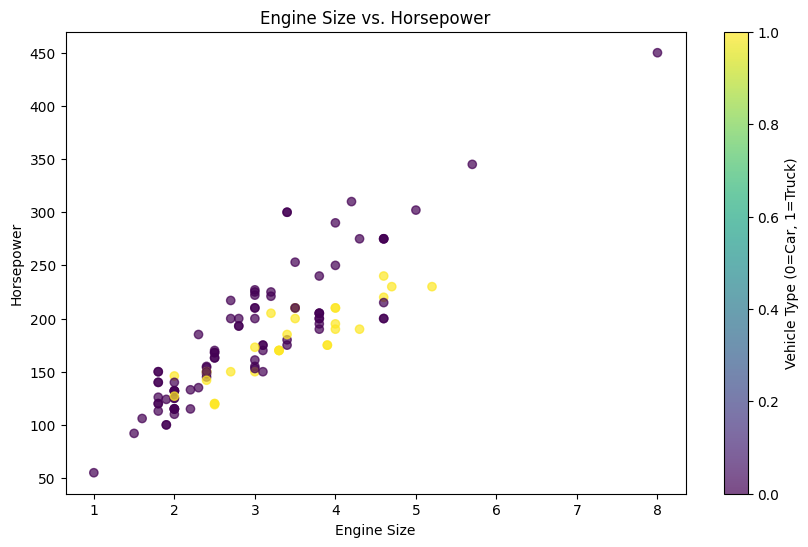

In [ ]:
# @title Engine Size vs. Horsepower

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pdf['engine_s'], pdf['horsepow'], c=pdf['type'], alpha=0.7)
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.title('Engine Size vs. Horsepower')
_ = plt.colorbar(label='Vehicle Type (0=Car, 1=Truck)')

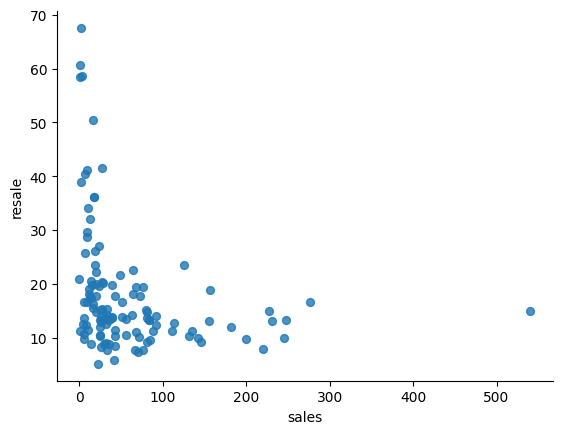

In [ ]:
# @title sales vs resale

from matplotlib import pyplot as plt
pdf.plot(kind='scatter', x='sales', y='resale', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Pré-processamento: normalização dos dados**

---



In [ ]:
def preprocess_data(df):
    """Função para limpeza e normalização dos dados."""
    # Seleciona apenas features numéricas relevantes para a análise
    featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

    # Normaliza os dados para o intervalo [0, 1] usando MinMaxScaler
    scaler = MinMaxScaler()
    feature_mtx = scaler.fit_transform(featureset)

    # Reconstrói um DataFrame com as colunas normalizadas e seus nomes originais
    normalized_df = pd.DataFrame(feature_mtx, columns=featureset.columns)
    # ...
    return normalized_df, feature_mtx

normalized_df, feature_mtx = preprocess_data(pdf)

# Mostra as 5 primeiras linhas do DataFrame normalizado
print("Dados normalizados:")
print(normalized_df.head())

Dados normalizados:
   engine_s  horsepow  wheelbas     width    length  curb_wgt  fuel_cap  \
0  0.114286  0.215190  0.186551  0.281437  0.306258  0.231056  0.133641   
1  0.314286  0.430380  0.336226  0.461078  0.579228  0.503727  0.317972   
2  0.357143  0.392405  0.477223  0.526946  0.628495  0.607143  0.354839   
3  0.114286  0.240506  0.216920  0.335329  0.380826  0.342547  0.281106   
4  0.257143  0.367089  0.349241  0.808383  0.567244  0.517391  0.377880   

        mpg  
0  0.433333  
1  0.333333  
2  0.233333  
3  0.400000  
4  0.233333  


## **Agrupamento Hierárquico usando o SciPy**

---



Nesta seção, vamos explorar a biblioteca SciPy para realizar o agrupamento hierárquico do conjunto de dados. O primeiro passo é calcular a matriz de distâncias, que quantifica a dissimilaridade entre cada par de pontos de dados.

O agrupamento aglomerativo, que estamos utilizando, exige que a matriz de distância seja atualizada a cada iteração. Isso ocorre porque, a cada passo, dois clusters são mesclados, e a distância entre esse novo cluster e os demais precisa ser recalculada.

A biblioteca SciPy oferece diferentes métodos para calcular essa distância, cada um com suas características e resultados específicos:

* `single` (único): Considera a menor distância entre dois pontos de cada cluster.
* `complete` (completo): Utiliza a maior distância entre dois pontos de cada cluster.
* `average `(média): Calcula a distância média entre todos os pares de pontos dos clusters.
* `weighted` (ponderado): Similar à ligação média, mas pondera as distâncias pelo tamanho dos clusters.
* `centroid` (centróide): Calcula a distância entre os centróides dos clusters.

Aqui optamos por utilizar o método complete, que tende a formar clusters mais compactos.

### **Cálculo da matriz de distâncias**

---



O cálculo da matriz de distâncias pode ser feito diretamente utilizando `scipy.spatial.distance.cdist`, que é mais eficiente e legível.

In [ ]:
# Obtém o número de linhas do conjunto de features
leng = feature_mtx.shape[0]

# Validação: Exibe um aviso se o conjunto de dados for muito grande
if leng > 1000:
    print("Aviso: O cálculo da matriz de distâncias pode ser demorado para matrizes muito grandes.")

# Calcula a matriz de distâncias euclidianas entre todas as linhas de feature_mtx
D = distance.cdist(feature_mtx, feature_mtx, metric='euclidean')

# Exibe as primeiras 5 linhas e colunas da matriz de distâncias para validação
print("Matriz de distâncias (parcial):")
print(D[:5, :5])

Matriz de distâncias (parcial):
[[0.         0.57777143 0.75455727 0.2128736  0.77290095]
 [0.57777143 0.         0.22798938 0.42100416 0.37680338]
 [0.75455727 0.22798938 0.         0.59253153 0.3443332 ]
 [0.2128736  0.42100416 0.59253153 0.         0.61659183]
 [0.77290095 0.37680338 0.3443332  0.61659183 0.        ]]


In [ ]:
# Calcula a matriz de ligação utilizando o método 'complete'
# A matriz Z permitirá criar dendrogramas e definir os agrupamentos baseados em critérios diferentes
Z = linkage(feature_mtx, method='complete')

# Define o corte na árvore hierárquica pela distância máxima (max_d) entre os clusters.
# fcluster separa os dados em clusters baseando-se nesse critério.
max_d = 3
clusters_by_distance = fcluster(Z, max_d, criterion='distance')

# Exibe os clusters gerados pelo critério de distância
print("Clusters (critério por distância):")
print(clusters_by_distance)

Clusters (critério por distância):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [ ]:
# Define o número máximo de clusters
# A função fcluster cria exatamente 5 clusters, independentemente das distâncias entre os pontos ou clusters.
k = 5
clusters_by_maxclust = fcluster(Z, k, criterion='maxclust')

# Exibe os clusters gerados pelo critério de número de clusters
print("Clusters (critério por número máximo de clusters):")
print(clusters_by_maxclust)

Clusters (critério por número máximo de clusters):
[1 5 5 1 5 5 1 5 5 5 5 5 5 5 5 1 1 5 5 5 3 1 2 1 1 5 1 5 1 1 1 3 4 4 4 5 5
 1 5 1 5 5 5 5 4 5 4 1 1 1 5 5 1 1 1 5 1 1 5 5 5 5 5 5 1 1 1 5 1 5 5 1 1 5
 5 5 5 1 5 5 3 1 1 5 5 5 1 5 5 5 1 1 5 1 1 5 5 5 1 1 1 1 1 1 1 1 5 1 1 1 5
 4 1 1 1 1 1]


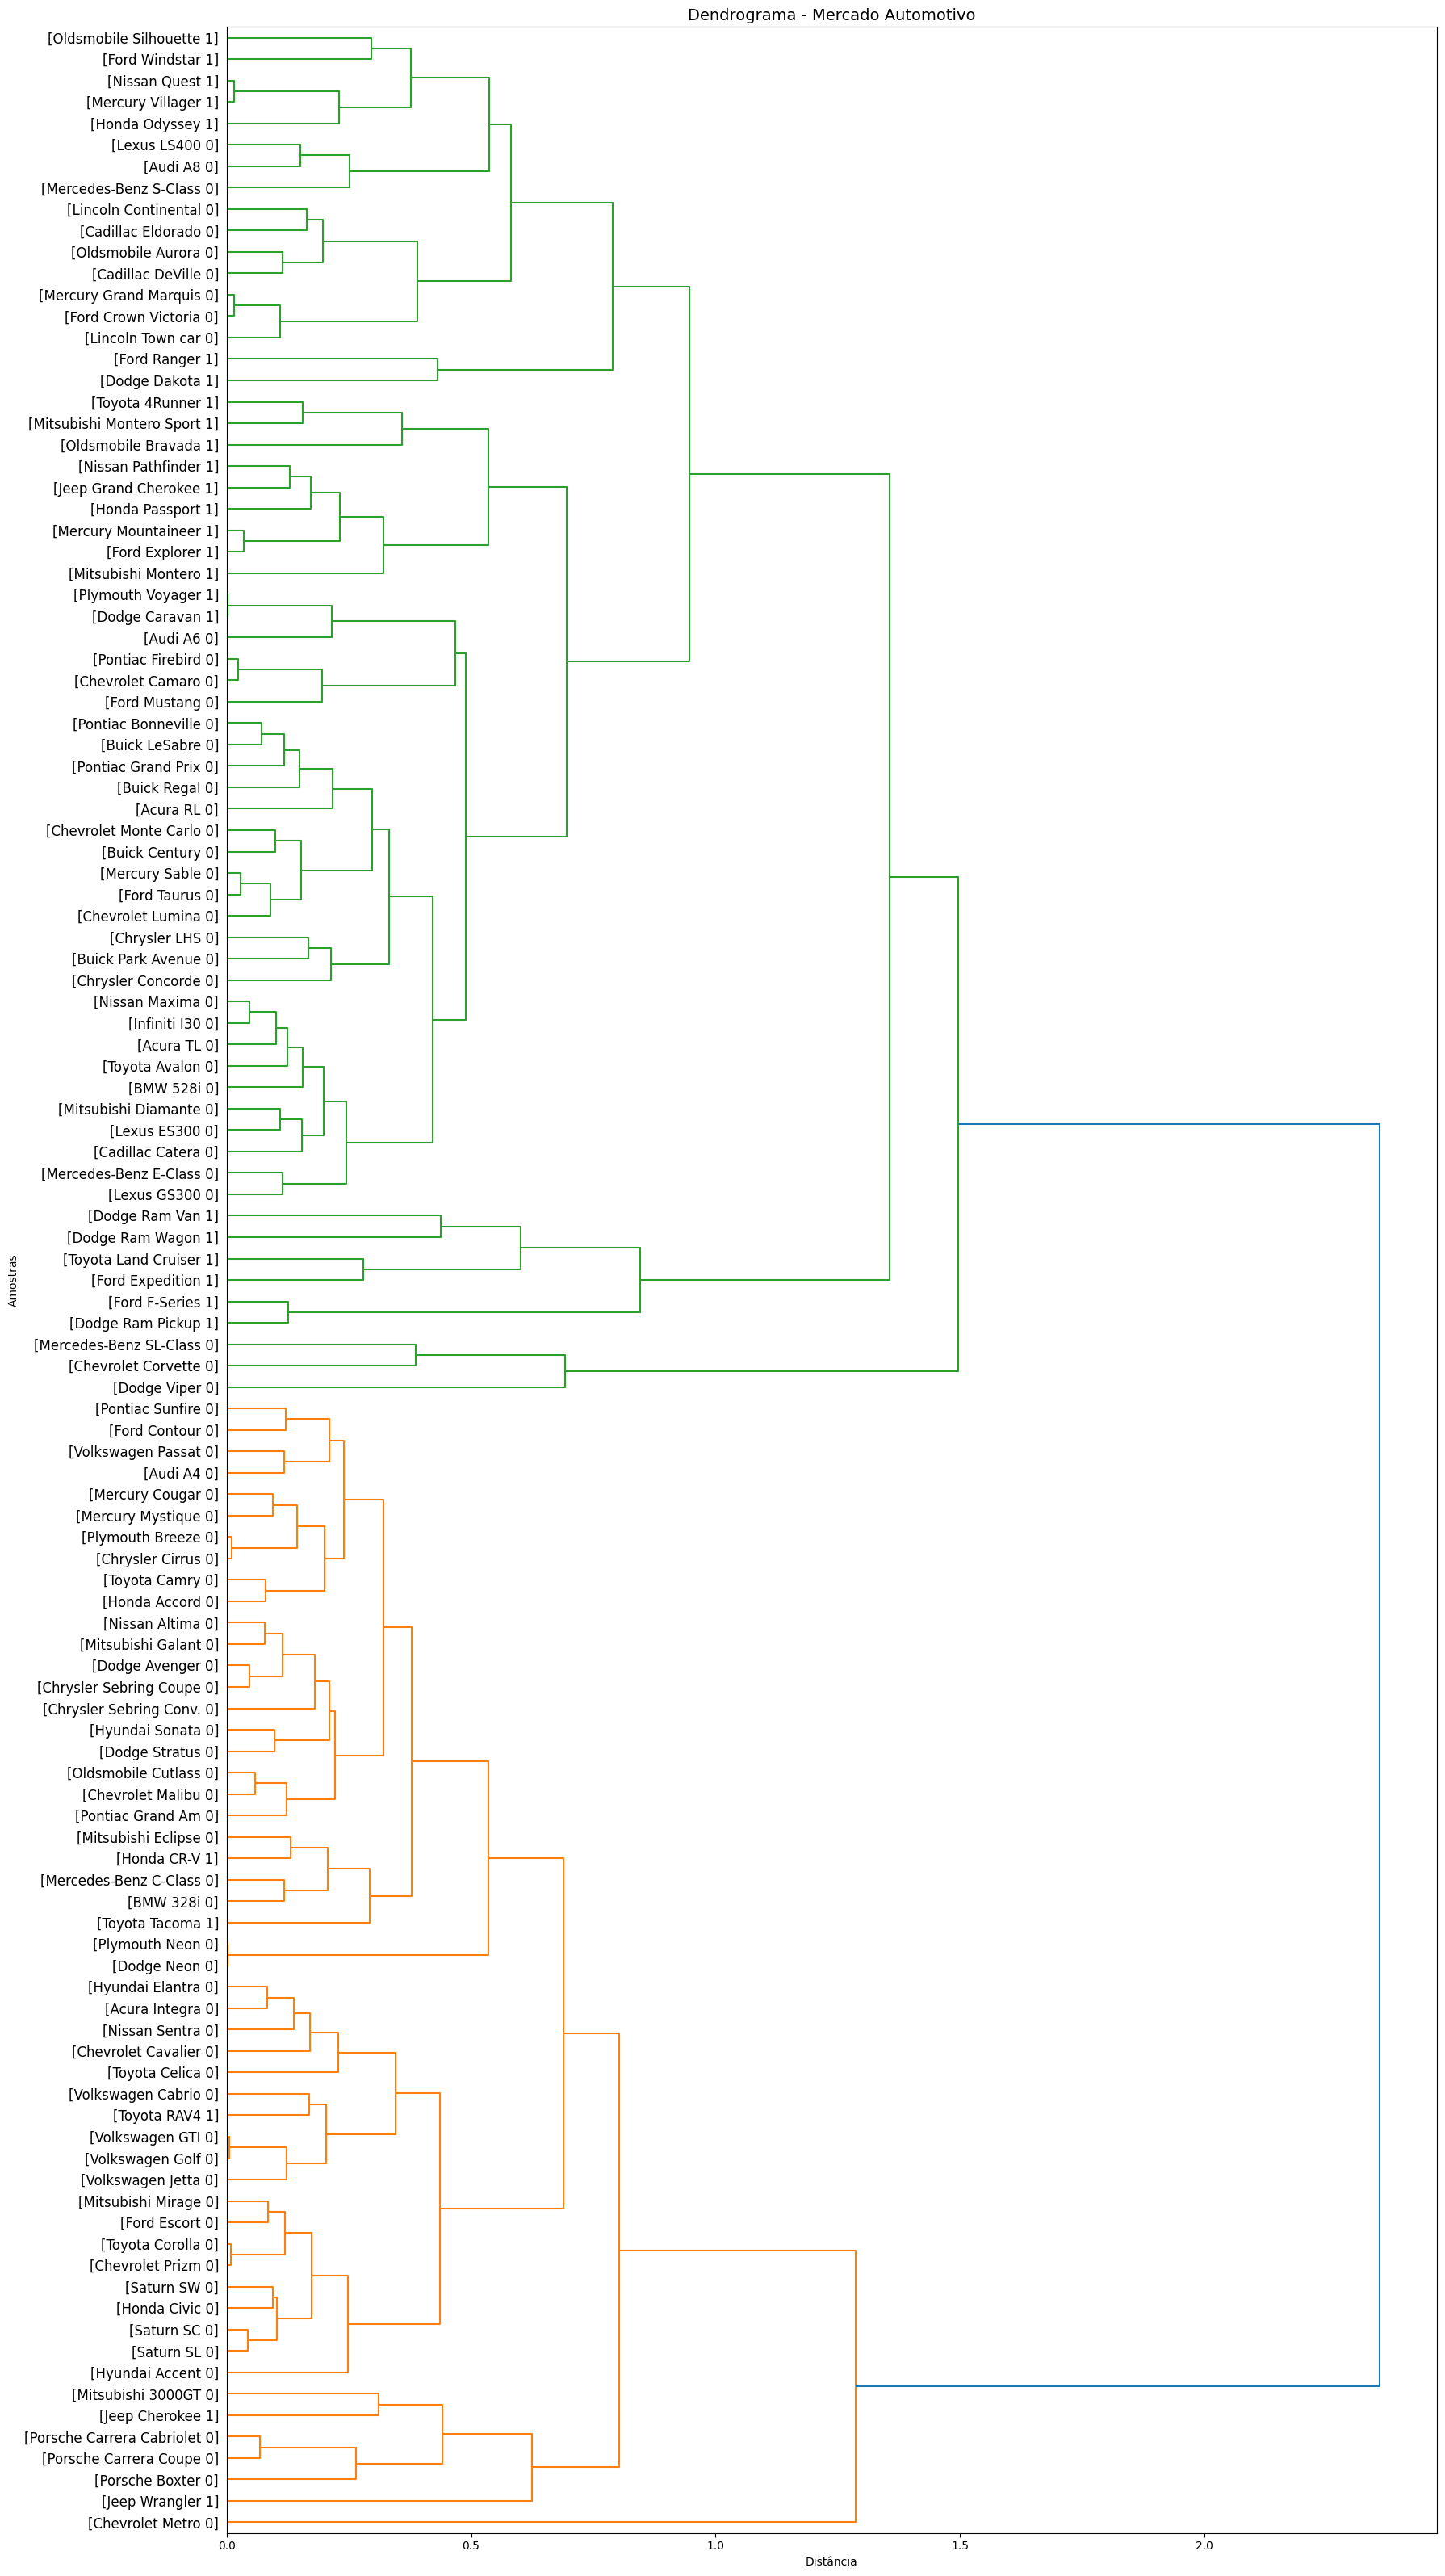

In [ ]:
import os

# Cria um diretório para salvar as imagens
if not os.path.exists('dendrogramas'):
    os.makedirs('dendrogramas')

# Função para rótulos das folhas no dendrograma
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))

# Calcula a matriz de ligação utilizando o método 'complete' # Assume 'complete' como padrão
Z = linkage(feature_mtx, method='complete')

# Plotando o dendrograma com rótulos personalizados
plt.figure(figsize=(18, 32))  # Ajuste da figura
dendro = dendrogram(
    Z,
    leaf_label_func=llf,   # Função para rótulos personalizados
    leaf_rotation=0,       # Rotação das folhas
    leaf_font_size=12,     # Tamanho da fonte
    orientation='right'    # Orientação do dendrograma
)
plt.title('Dendrograma - Mercado Automotivo', fontsize=14)
plt.xlabel('Distância', fontsize=10)
plt.ylabel('Amostras', fontsize=10)
plt.tight_layout()  # Ajuste automático para evitar sobreposição

# Salva a figura no diretório 'dendrogramas' usando 'complete' como nome do arquivo
plt.savefig(f'dendrogramas/dendrograma_complete.png')

plt.show()

### **Análise do Dendrograma do Mercado Automotivo**

O dendrograma acima é uma representação hierárquica das relações entre diferentes veículos no mercado automotivo, agrupados com base em características ou atributos (como dimensões, potência, peso médio, consumo (mpg	/ milhas por galão), autonomia etc.), refletindo as segmentações naturais do mercado automotivo, como SUVs, compactos, minivans e esportivos.

**Pontos Observados no Dendrograma**

* **Eixo X**: o eixo horizontal representa a distância ou dissimilaridade entre os grupos. Quanto maior a distância entre dois ramos que se unem, mais diferentes são os grupos.
* **Eixo Y**: cada linha do eixo Y é uma amostra (um veículo) com informações adicionais, como marca, modelo e uma classificação de atributos.

**Agrupamentos Observados (dendrograma deitado)**

Clusters mais amplos são formados nas junções superiores à medida em que "subimos" no dendrograma, veículos de categorias diferentes começam a se unir, formando agrupamentos mais amplos. Assim, há dois grandes agrupamentos visíveis, clusters principais no nível superior:

* **Grupo 1 (lado esquerdo/cor verde)**: contém veículos maiores e mais robustos, como SUVs, minivans e caminhonetes.
* **Grupo 2 (lado direito/cor laranja)**: contém veículos menores, como sedãs compactos e esportivos.

Nos clusters compactos na base do dendrograma (amostras), estão os veículos "próximos" uns dos outros, isto é, que possuem características muito semelhantes. Por exemplo: Oldsmobile Silhouette, Ford Windstar e Nissan Quest são veículos do segmento minivan, formando um agrupamento claro.



## **Agrupamento Hierárquico usando o Scikit-learn**

---



In [ ]:
# Calcula a matriz de distâncias euclidianas
dist_matrix = euclidean_distances(feature_mtx, feature_mtx)

# Validação da matriz de distâncias
if dist_matrix.shape[0] != dist_matrix.shape[1]:
    raise ValueError("A matriz de distâncias deve ser quadrada!")

# Exibe um resumo da matriz (exibição parcial para grandes matrizes)
print("Resumo da Matriz de Distâncias (5x5):")
print(pd.DataFrame(dist_matrix[:5, :5]))

# Estatísticas básicas da matriz de distâncias
min_dist = np.min(dist_matrix)
max_dist = np.max(dist_matrix)
mean_dist = np.mean(dist_matrix)
std_dist = np.std(dist_matrix)

print("\nEstatísticas da Matriz de Distâncias:")
print(f"Menor Distância: {min_dist:.2f}")
print(f"Maior Distância: {max_dist:.2f}")
print(f"Distância Média: {mean_dist:.2f}")
print(f"Desvio Padrão das Distâncias: {std_dist:.2f}")


Resumo da Matriz de Distâncias (5x5):
          0         1         2         3         4
0  0.000000  0.577771  0.754557  0.212874  0.772901
1  0.577771  0.000000  0.227989  0.421004  0.376803
2  0.754557  0.227989  0.000000  0.592532  0.344333
3  0.212874  0.421004  0.592532  0.000000  0.616592
4  0.772901  0.376803  0.344333  0.616592  0.000000

Estatísticas da Matriz de Distâncias:
Menor Distância: 0.00
Maior Distância: 2.36
Distância Média: 0.61
Desvio Padrão das Distâncias: 0.33


In [ ]:
# Certifica se a matriz de distância é simétrica
dist_matrix = 0.5 * (dist_matrix + dist_matrix.T)  # Média com sua transposição

# Converte a matriz de distâncias quadrada para o formato condensado
dist_matrix_condensed = squareform(dist_matrix)

# Calcula a matriz de ligação utilizando o método 'complete'
Z_using_dist_matrix = hierarchy.linkage(dist_matrix_condensed, method='complete')

# Exibe as primeiras linhas da matriz de ligação
print("Matriz de Ligação (primeiras linhas):")
print(Z_using_dist_matrix[:10])

Matriz de Ligação (primeiras linhas):
[[3.60000000e+01 9.20000000e+01 1.55279503e-03 2.00000000e+00]
 [2.80000000e+01 9.00000000e+01 2.48447205e-03 2.00000000e+00]
 [1.12000000e+02 1.16000000e+02 4.86287513e-03 2.00000000e+00]
 [2.10000000e+01 1.04000000e+02 8.20628623e-03 2.00000000e+00]
 [2.60000000e+01 9.10000000e+01 1.04231898e-02 2.00000000e+00]
 [7.60000000e+01 8.40000000e+01 1.46568837e-02 2.00000000e+00]
 [4.10000000e+01 7.40000000e+01 1.55279503e-02 2.00000000e+00]
 [1.90000000e+01 9.50000000e+01 2.42274159e-02 2.00000000e+00]
 [4.00000000e+01 7.30000000e+01 2.86220282e-02 2.00000000e+00]
 [4.20000000e+01 7.50000000e+01 3.42774093e-02 2.00000000e+00]]


Imagem do dendrograma salva como: dendrograma_mercado_automotivo.png


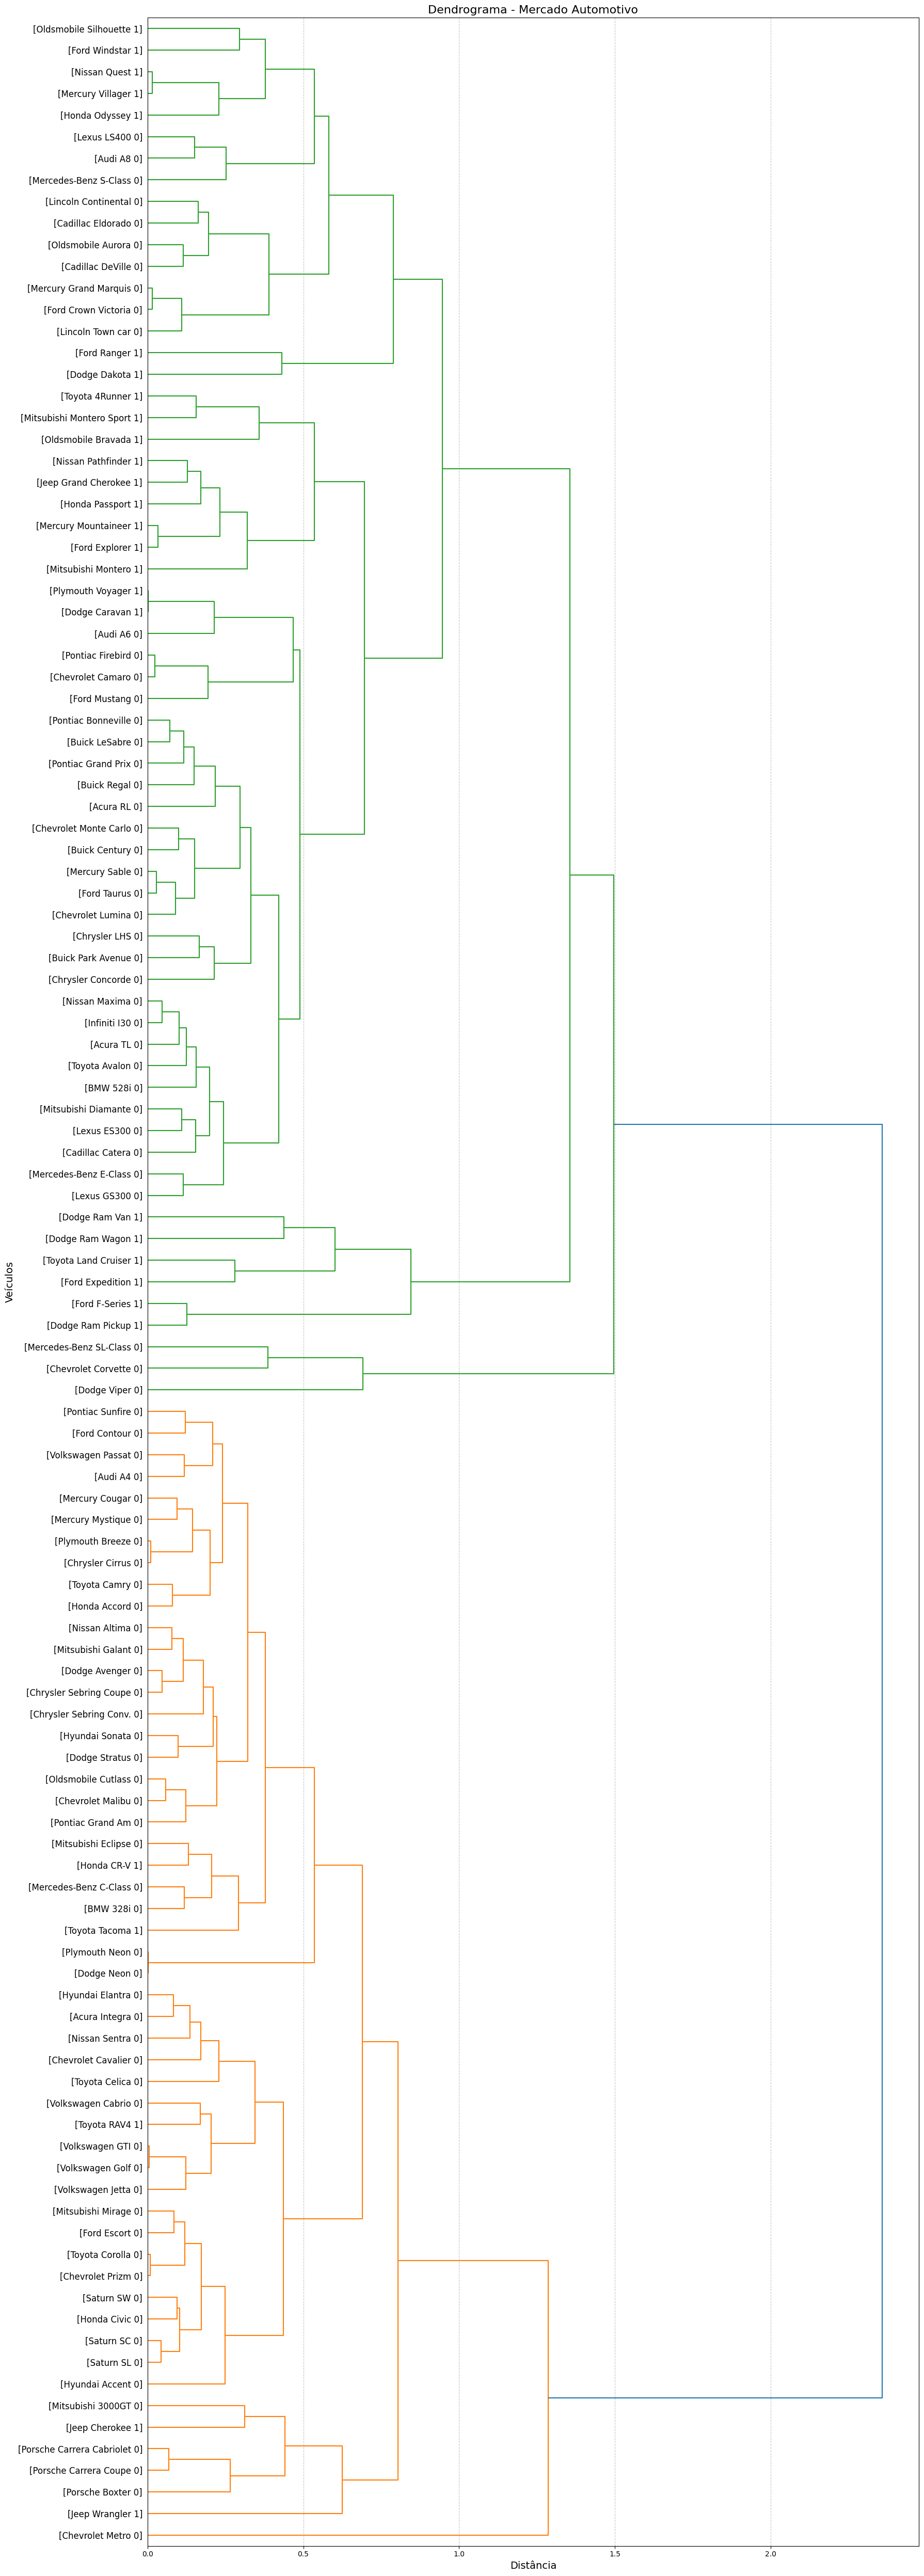

In [ ]:
# Ajusta o tamanho da figura para uma melhor visualização
plt.figure(figsize=(18, 50))

# Função para gerar rótulos personalizados no dendrograma
def llf(id):
    try:
        return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))
    except KeyError:
        raise KeyError("Certifique-se de que o DataFrame 'pdf' contém as colunas 'manufact', 'model' e 'type'.")

# Gera o dendrograma com rótulos personalizados
dendro = dendrogram(
    Z_using_dist_matrix,  # Matriz de ligação
    leaf_label_func=llf,  # Função para rótulos personalizados
    leaf_rotation=0,      # Rotação das folhas
    leaf_font_size=12,    # Tamanho da fonte dos rótulos
    orientation='right'   # Orientação do dendrograma
)

# Configurações adicionais para o gráfico
plt.title('Dendrograma - Mercado Automotivo', fontsize=16)
plt.xlabel('Distância', fontsize=14)
plt.ylabel('Veículos', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adiciona uma grade no eixo X para facilitar a análise
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Salva o dendrograma como uma imagem
output_filename = "dendrograma_mercado_automotivo.png"
plt.savefig(output_filename, format='png', dpi=300, bbox_inches='tight')
print(f"Imagem do dendrograma salva como: {output_filename}")

# Exibe o dendrograma
plt.show()

In [ ]:
# Configurações para o agrupamento hierárquico
n_clusters = 6  # Número de clusters desejados
linkage_method = 'complete'  # Método de ligação entre clusters

# Criação do modelo AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)

# Ajuste do modelo com a matriz de distâncias
agglom.fit(dist_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='complete', n_clusters=6)

In [ ]:
# Obtenção dos rótulos dos clusters
labels = agglom.labels_

# Exibe os clusters gerados
print(f"Rótulos dos Clusters ({n_clusters} clusters):")
print(labels)

# Estatísticas sobre os clusters
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nResumo dos Clusters:")
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} elementos")

Rótulos dos Clusters (6 clusters):
[1 2 2 3 2 4 3 2 2 2 2 2 4 4 2 1 3 2 2 2 4 1 5 3 3 2 3 2 1 3 3 0 0 0 0 4 2
 1 3 3 2 4 2 4 0 3 0 1 3 3 2 4 1 1 3 2 1 3 2 2 2 4 4 4 1 3 3 2 3 4 3 3 3 2
 4 2 2 3 2 4 4 1 3 2 2 2 3 4 2 4 1 3 2 3 3 2 2 2 3 3 3 1 1 1 1 3 2 1 1 1 3
 0 1 1 3 1 1]

Resumo dos Clusters:
Cluster 0: 7 elementos
Cluster 1: 23 elementos
Cluster 2: 36 elementos
Cluster 3: 33 elementos
Cluster 4: 17 elementos
Cluster 5: 1 elementos


In [ ]:
# Silhouette_score
silhouette_avg = silhouette_score(feature_mtx, agglom.labels_)
print(f"Coeficiente de silhueta: {silhouette_avg:.4f}")

Coeficiente de silhueta: 0.2284


In [ ]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


Gráfico salvo como: clusters_mercado_automotivo.png


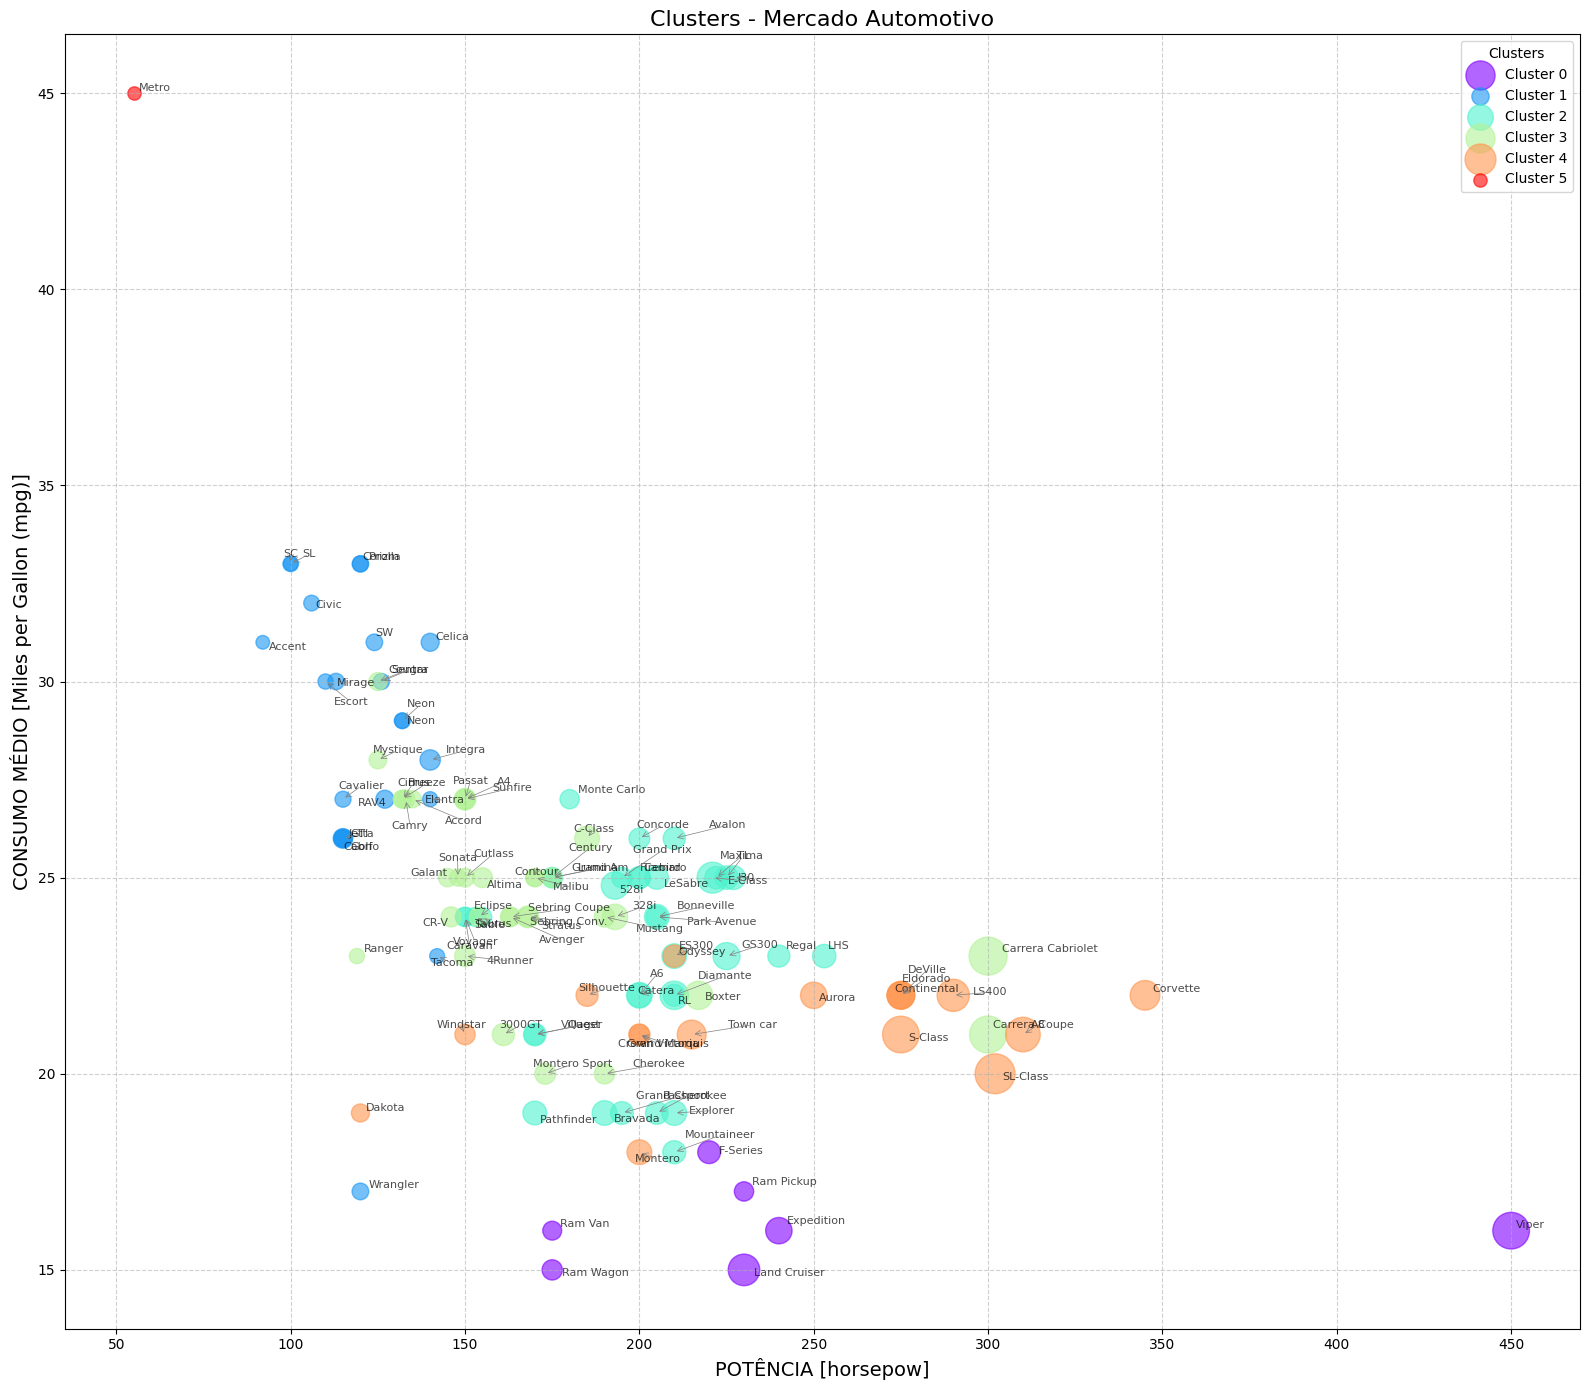

In [ ]:
import matplotlib.cm as cm
from adjustText import adjust_text

# Define o número de clusters e suas cores
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(n_clusters))

# Criação de uma figura de tamanho maior para melhor visualização
plt.figure(figsize=(16, 14))

# Lista para armazenar os textos para ajuste posterior
texts = []

# Itera sobre cada cluster para plotar os pontos e rótulos
for color, label in zip(colors, cluster_labels):
    # Seleciona os dados do cluster atual
    subset = pdf[pdf.cluster_ == label]

    # Plota os pontos do cluster com tamanho proporcional ao preço
    plt.scatter(
        subset.horsepow, subset.mpg,
        s=subset.price * 10, c=[color], label='Cluster ' + str(label), alpha=0.6
    )

    # Adiciona os rótulos dos modelos à lista de textos
    for i in subset.index:
        texts.append(
            plt.text(
                subset.horsepow[i], subset.mpg[i],
                str(subset['model'][i]), fontsize=8, color='black', alpha=0.7
            )
        )

# Ajusta os textos para evitar sobreposição
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),  # Adiciona setas para os textos deslocados
    expand_points=(1.2, 1.5),  # Expande a área de ajuste
    expand_text=(1.2, 1.5),  # Expande a área ao redor do texto
)

# Configuração da legenda
plt.legend(title="Clusters", loc='upper right', fontsize=10)

# Configurações adicionais do gráfico
plt.title('Clusters - Mercado Automotivo', fontsize=16)
plt.xlabel('POTÊNCIA [horsepow]', fontsize=14)
plt.ylabel('CONSUMO MÉDIO [Miles per Gallon (mpg)]', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Ajuste do layout
plt.tight_layout()

# Salva o gráfico como imagem
output_filename = "clusters_mercado_automotivo.png"
plt.savefig(output_filename, format='png', dpi=300, bbox_inches='tight')
print(f"Gráfico salvo como: {output_filename}")

# Exibe o gráfico
plt.show()

### **Contagem por Cluster e Tipo**

In [ ]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

### **Tabela Resumo de Contagem por Cluster e Tipo**

|**cluster** |**0.0**|**1.0**|
|------------|-------|-------|
| 0          | 1     | 6     |
| 1          | 20    | 3     |
| 2          | 26    | 10    |
| 3          | 28    | 5     |
| 4          | 12    | 5     |
| 5          | 1     | 0     |

In [ ]:
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000

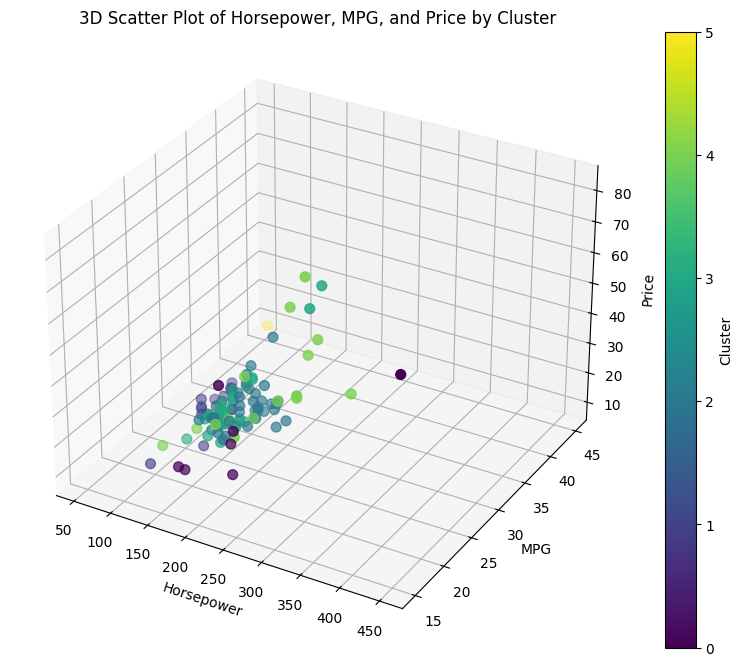

In [ ]:
# prompt: Crie um gráfico com três dimensões (horsepow, mpg, price)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cria a figura e os eixos 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plota os pontos com cores baseadas no cluster
scatter = ax.scatter(pdf['horsepow'], pdf['mpg'], pdf['price'], c=pdf['cluster_'], cmap='viridis', s=50)

# Define os rótulos dos eixos
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Horsepower, MPG, and Price by Cluster')

# Adiciona uma barra de cores para representar os clusters
plt.colorbar(scatter, label='Cluster')

# Exibe o gráfico
plt.show()

### **Avaliação Estatística dos Clusters**

---



In [ ]:
# Cria tabela com médias, desvios padrões e outros dados estatísticos de cada cluster
cluster_summary = pdf.groupby('cluster_').agg({
    'horsepow': ['mean', 'std'],
    'mpg': ['mean', 'std'],
    'price': ['mean', 'std']
}).reset_index()
print(cluster_summary)

  cluster_    horsepow                   mpg                price           
                  mean        std       mean       std       mean        std
0        0  245.714286  93.916123  16.142857  1.069045  34.839000  19.366440
1        1  119.956522  13.696311  28.608696  3.774786  14.234696   2.868066
2        2  197.611111  24.836928  23.133333  2.388066  27.469778   6.948346
3        3  166.212121  40.930396  24.636364  2.302420  23.953364  13.892336
4        4  239.823529  60.785725  21.176471  1.236694  39.914765  18.385965
5        5   55.000000        NaN  45.000000       NaN   9.235000        NaN


### **Análise Gráfica**

---



Gráfico salvo como: clusters_mercado_automotivo_corrigido.png


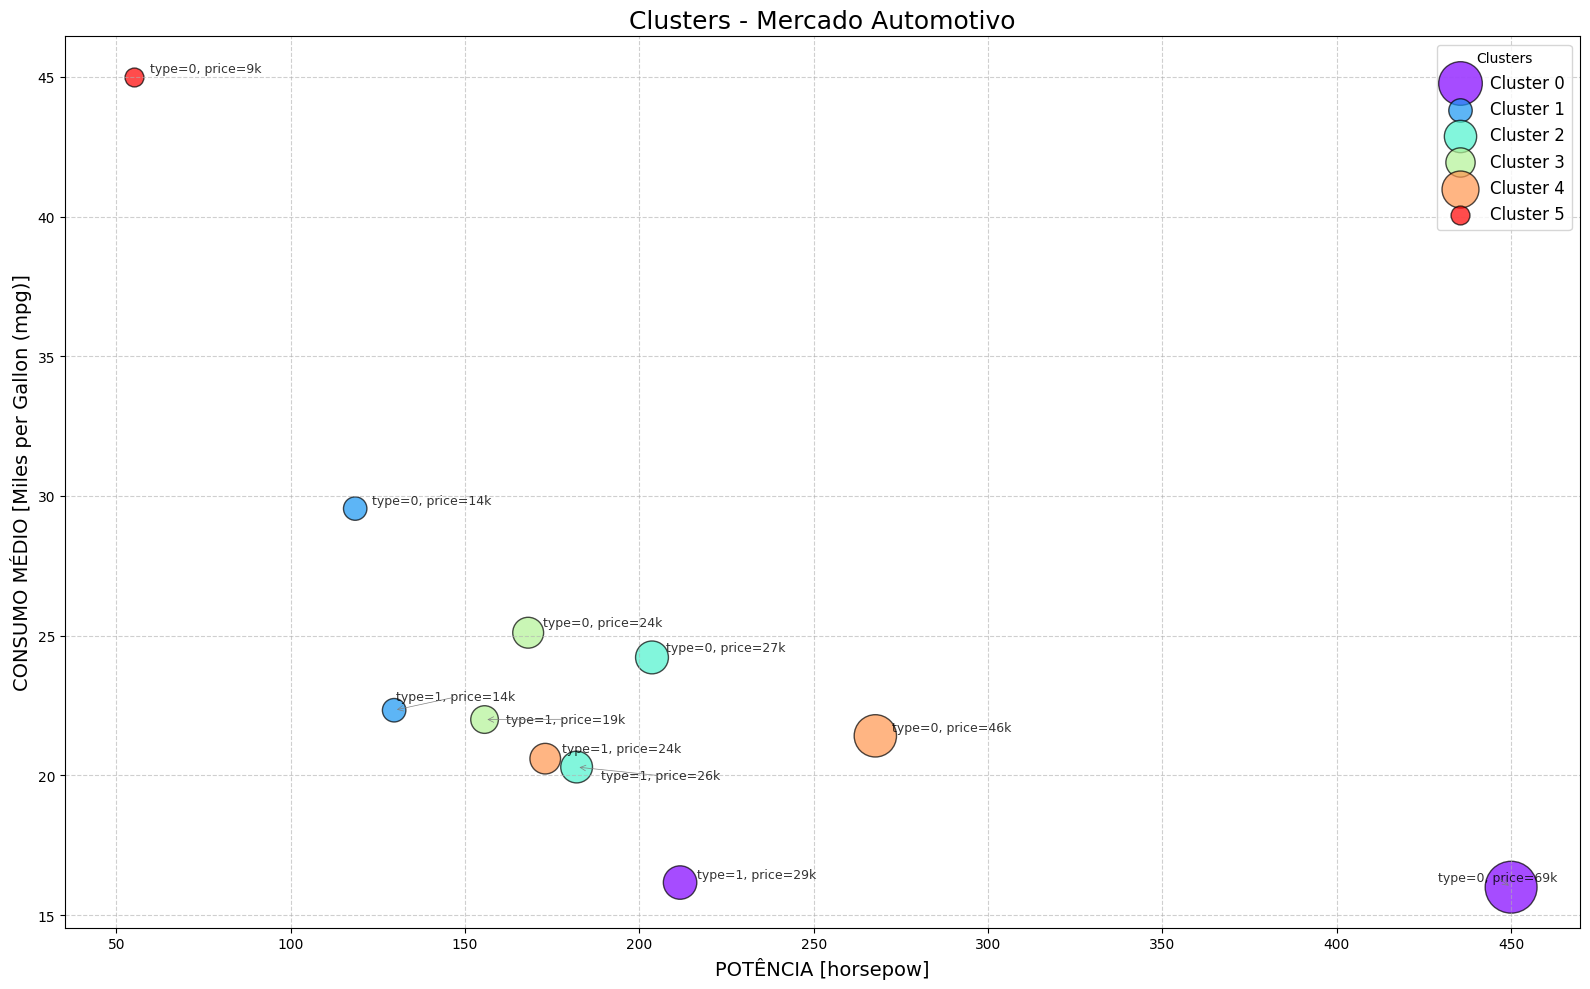

In [ ]:
# Define o número de clusters e suas cores
n_clusters = max(cluster_labels) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Criação da figura
plt.figure(figsize=(16, 10))

# Lista para armazenar os textos para ajuste posterior
texts = []

# Iteração sobre os clusters
for color, label in zip(colors, cluster_labels):
    # Seleciona os dados do cluster atual
    subset = agg_cars.loc[(label,), ]

    # Adiciona os rótulos para ajuste
    for i in subset.index:
        texts.append(
            plt.text(
                subset.loc[i, 'horsepow'],  # Acessa 'horsepow' por rótulo
                subset.loc[i, 'mpg'],      # Acessa 'mpg' por rótulo
                f"type={int(i)}, price={int(subset.loc[i, 'price'])}k",  # Acessa 'price' por rótulo
                fontsize=9, color='black', alpha=0.8
            )
        )

    # Plota os pontos do cluster
    plt.scatter(
        subset['horsepow'], subset['mpg'],  # Acessa as colunas por nome
        s=subset['price'] * 20, c=[color],
        label=f'Cluster {label}', alpha=0.7, edgecolor='k'
    )

# Ajusta os textos para evitar sobreposição
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),
    expand_points=(1.2, 1.5),
    expand_text=(1.2, 1.5)
)

# Configurações adicionais do gráfico
plt.legend(title="Clusters", loc='upper right', fontsize=12)
plt.title('Clusters - Mercado Automotivo', fontsize=18)
plt.xlabel('POTÊNCIA [horsepow]', fontsize=14)
plt.ylabel('CONSUMO MÉDIO [Miles per Gallon (mpg)]', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Ajuste do layout
plt.tight_layout()

# Salvamento do gráfico
output_filename = "clusters_mercado_automotivo_corrigido.png"
plt.savefig(output_filename, format='png', dpi=300, bbox_inches='tight')
print(f"Gráfico salvo como: {output_filename}")

# Exibe o gráfico
plt.show()

## **Referãncias**

  ALJUMILY, Refat. Agglomerative hierarchical clustering: an introduction to essentials.(1) proximity coefficients and creation of a vector-distance matrix and (2) construction of the hierarchical tree and a selection of methods. Global Journal of Human-Social Science, v. 16, n. 3, p. 22-50, 2016.
  Disponível em: https://asels.org/wp-content/themes/asels/uploads/20118_5f9ec67805003.pdf. Acesso em: 6 jan. 2025.
  
  ROKACH, Lior. Hierarchical Clustering.  Department of Computer Science, Ben-Gurion University of the Negev. Beer-Sheva, Israel, 2022. Disponível em: https://www.cs.princeton.edu/courses/archive/fall18/cos324/files/hierarchical-clustering.pdf. Acesso em: 5 jan. 2025.
  
  SCIKIT-LEARN. AgglomerativeClustering — scikit-learn 1.6.0 documentation. Documentação oficial do Scikit-Learn sobre a classe AgglomerativeClustering, detalhando parâmetros, atributos e exemplos de uso. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html. Acesso em: 4 jan. 2025.

